# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"  # Using f-string to insert city and API key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mana
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | bartica
Processing Record 4 of Set 1 | nuuk
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | dhidhdhoo
Processing Record 8 of Set 1 | crane
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | belmonte
Processing Record 11 of Set 1 | marquard
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | egilsstadir
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | zeya
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | puerto baquerizo moreno
Processing Record 23 of Set 1 | olonkinb

In [27]:
print(len(city_data))
#print("city weather response", city_weather)

572


In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mana,5.6592,-53.7767,299.23,88,85,3.79,GF,1702337262
1,port-aux-francais,-49.3500,70.2167,278.88,98,99,10.77,TF,1702337055
2,bartica,6.4000,-58.6167,300.33,85,88,1.81,GY,1702337263
3,nuuk,64.1835,-51.7216,274.49,86,100,18.01,GL,1702336973
4,stanley,54.8680,-1.6985,272.33,94,40,0.51,GB,1702337019


In [32]:
# Export the City_Data into a csv
output_path = r"C:\Users\lenar\OneDrive\Documents\Data Bootcamp\python-api-challenge\WeatherPy\Starter_Code\Starter_Code\output_data\cities.csv"

city_data_df.to_csv(output_path, index_label="City_ID")



In [33]:
# Read saved data
city_data_df = pd.read_csv(output_path)

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,mana,5.6592,-53.7767,299.23,88,85,3.79,GF,1702337262
1,1,port-aux-francais,-49.3500,70.2167,278.88,98,99,10.77,TF,1702337055
2,2,bartica,6.4000,-58.6167,300.33,85,88,1.81,GY,1702337263
3,3,nuuk,64.1835,-51.7216,274.49,86,100,18.01,GL,1702336973
4,4,stanley,54.8680,-1.6985,272.33,94,40,0.51,GB,1702337019


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

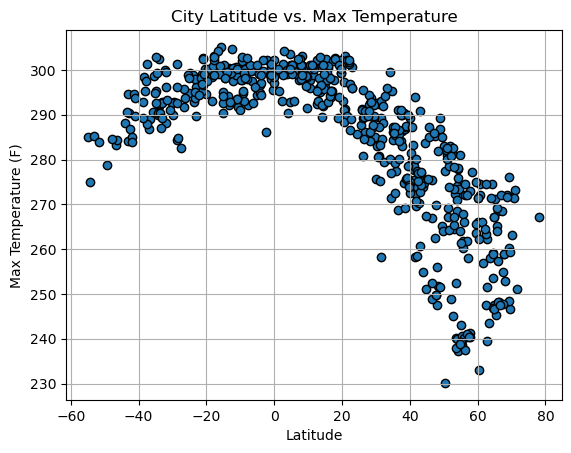

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
output_path = r"C:\Users\lenar\OneDrive\Documents\Data Bootcamp\python-api-challenge\WeatherPy\Starter_Code\Starter_Code\output_data"
plt.savefig(f"{output_path}/Latitude_vs_Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

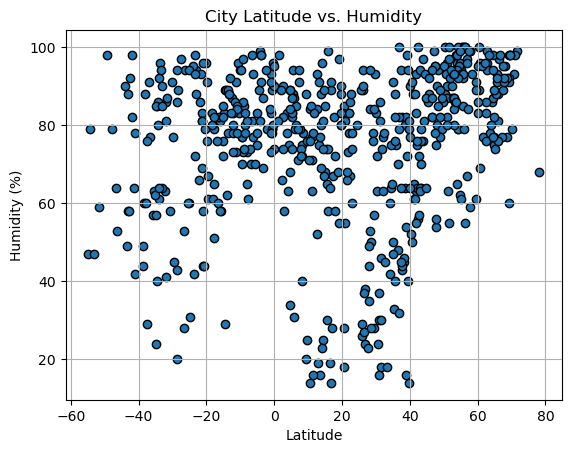

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig(f"{output_path}/Latitude_vs_Humidity.png")
plt.show()

#### Latitude Vs. Cloudiness

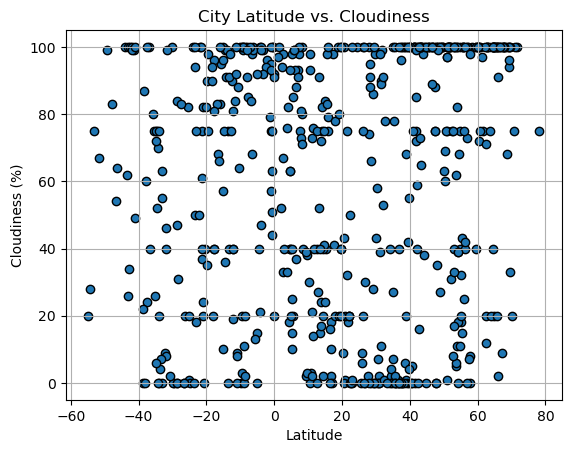

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig(f"{output_path}/Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

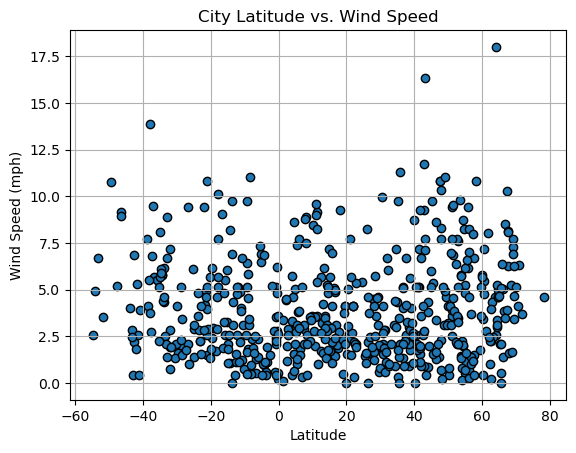

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig(f"{output_path}/Latitude_vs_Wind_Speed.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black")

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Annotate the r-value as a title above the entire plot
    r_label = f"R-Value: {round(rvalue**2, 4)}"
    plt.suptitle(r_label, fontsize=12, color="red", y=0.98)

    # Label plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show plot
    plt.show()


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,mana,5.6592,-53.7767,299.23,88,85,3.79,GF,1702337262
2,2,bartica,6.4000,-58.6167,300.33,85,88,1.81,GY,1702337263
3,3,nuuk,64.1835,-51.7216,274.49,86,100,18.01,GL,1702336973
4,4,stanley,54.8680,-1.6985,272.33,94,40,0.51,GB,1702337019
6,6,dhidhdhoo,6.8833,73.1000,301.01,71,93,0.31,MV,1702337265


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,port-aux-francais,-49.3500,70.2167,278.88,98,99,10.77,TF,1702337055
5,5,grytviken,-54.2811,-36.5092,274.94,79,28,4.91,GS,1702337068
9,9,belmonte,-15.8631,-38.8828,299.31,81,83,5.52,BR,1702337101
10,10,marquard,-28.6645,27.4305,284.47,86,47,2.01,ZA,1702337267
12,12,ushuaia,-54.8000,-68.3000,284.96,47,20,2.57,AR,1702337069


###  Temperature vs. Latitude Linear Regression Plot

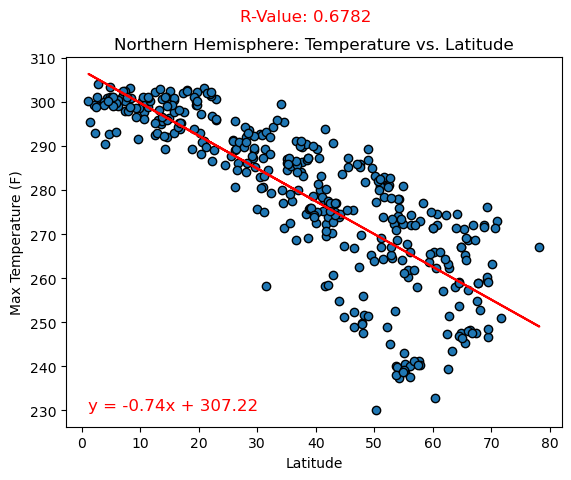

<Figure size 640x480 with 0 Axes>

In [42]:
# Northern Hemisphere: Temperature vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Use the function for linear regression
plot_linear_regression(x_values, y_values, "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (F)", "Northern Hemisphere")

# Save the figure
plt.savefig(f"{output_path}/Northern_Hemisphere_Temperature_vs_Latitude.png")
# Show plot
plt.show()


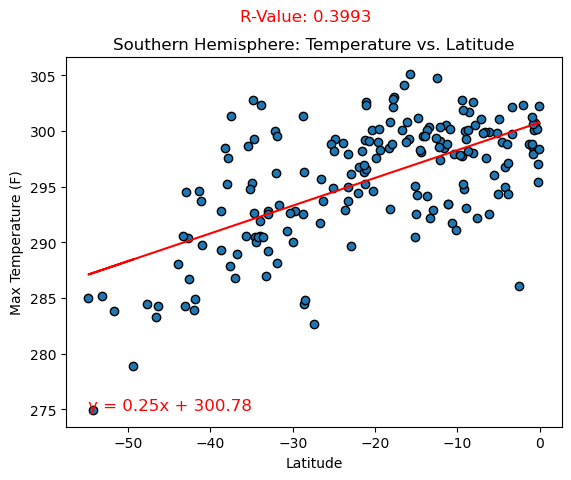

<Figure size 640x480 with 0 Axes>

In [44]:
# Southern Hemisphere: Temperature vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Use the function for linear regression
plot_linear_regression(x_values, y_values, "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (F)", "Southern Hemisphere")

# Save the figure
plt.savefig(f"{output_path}/Southern_Hemisphere_Temperature_vs_Latitude.png")


Our analysis clearly shows that temperature decreases as we move away from the equator. Conversely, temperatures increase as we approach the equator. These are statistically significant findings.

### Humidity vs. Latitude Linear Regression Plot

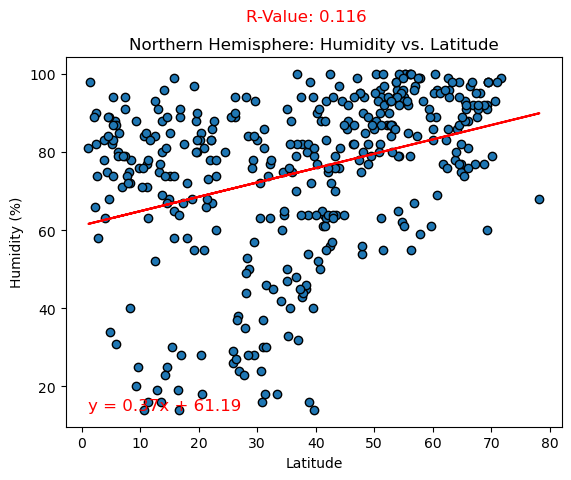

<Figure size 640x480 with 0 Axes>

In [47]:
# Northern Hemisphere: Humidity vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Use the function for linear regression
plot_linear_regression(x_values, y_values, "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)", "Northern Hemisphere")

# Save the figure
plt.savefig(f'{output_path}/Humidity_vs_Latitude_Linear_Regression')

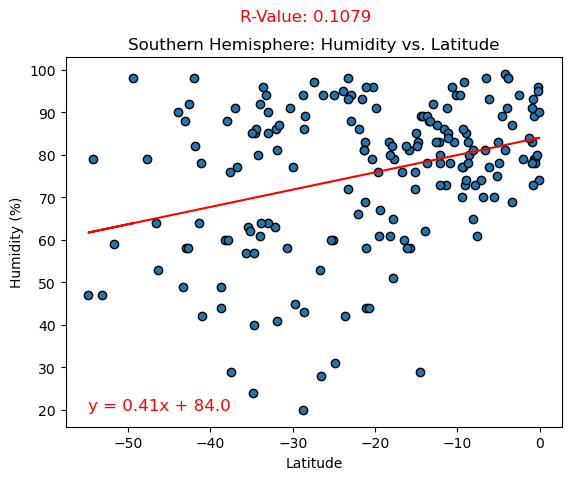

<Figure size 640x480 with 0 Axes>

In [48]:
# Southern Hemisphere: Humidity vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Use the function for linear regression
plot_linear_regression(x_values, y_values, "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)", "Southern Hemisphere")

# Save the figure
plt.savefig(f'{output_path}/Southern_Hemisphere_Humidity_vs_Latitude')

In the northern hemisphere we see humidity increasing as latitude increases. In the southern hemisphere we see humidity increasing as the latitude decreases. This shows us that it's humid around the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

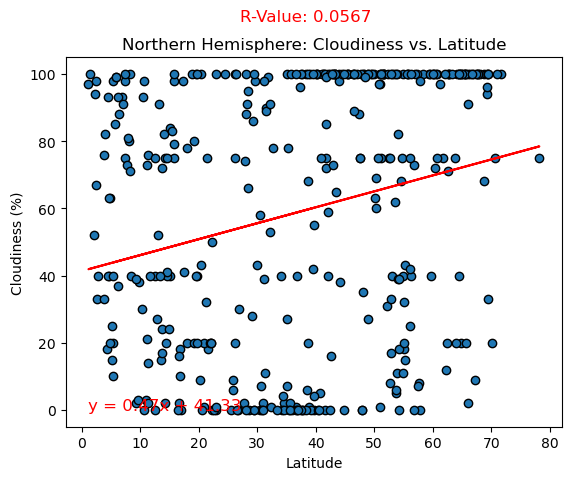

<Figure size 640x480 with 0 Axes>

In [49]:
# Northern Hemisphere: Cloudiness vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Use the function for linear regression
plot_linear_regression(x_values, y_values, "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Northern Hemisphere")

# Save the figure
plt.savefig(f'{output_path}/Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression')

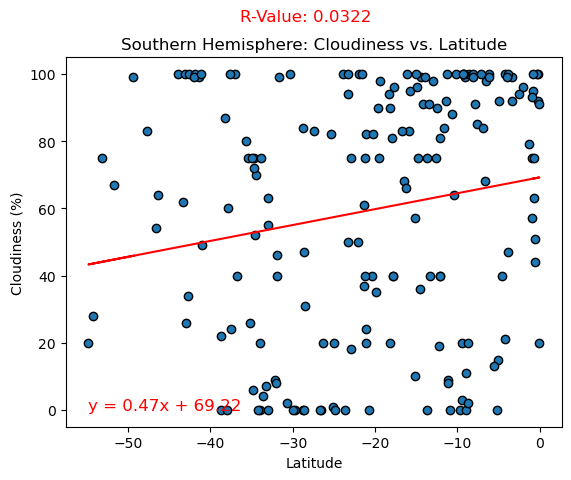

<Figure size 640x480 with 0 Axes>

In [50]:
# Southern Hemisphere: Cloudiness vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Use the function for linear regression
plot_linear_regression(x_values, y_values, "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)", "Southern Hemisphere")

# Save the figure
plt.savefig(f'{output_path}/Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression')

Not surprisingly, we see cloudiness behaving in much the same way as humidity, with cloudiness increasing in both hemispheres as we move toward the equator. This is consistent with other data we have analyzed. 

### Wind Speed vs. Latitude Linear Regression Plot

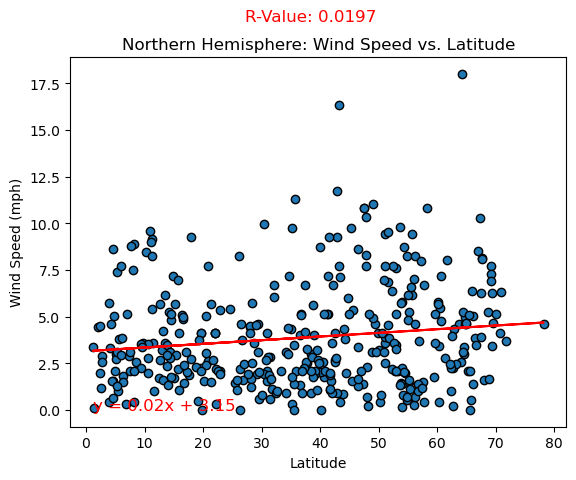

<Figure size 640x480 with 0 Axes>

In [51]:
# Northern Hemisphere: Wind Speed vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Use the function for linear regression
plot_linear_regression(x_values, y_values, "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Northern Hemisphere")

plt.savefig(f'{output_path}/Norhern_Hemisphere_WindSpeed_vs_Latitude_Linear_Regression')

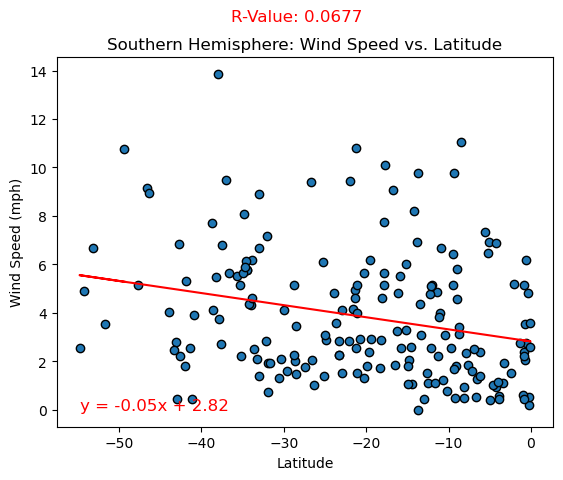

<Figure size 640x480 with 0 Axes>

In [52]:
# Southern Hemisphere: Wind Speed vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Use the function for linear regression
plot_linear_regression(x_values, y_values, "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (mph)", "Southern Hemisphere")

# Save the figure
plt.savefig(f'{output_path}/Southern_Hemisphere_WindSpeed_vs_Latitude_Linear_Regression')

In the northern hemisphere we do see wind speeds increasing with latitude, whereas in the southern hemisphere there is a slight decrease in wind speeds as latitude increases. This is not a statistically significant finding. 